In [ ]:
import pandas as pd
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving xAPI-Edu-Data.csv to xAPI-Edu-Data.csv


In [ ]:
df=pd.read_csv('xAPI-Edu-Data.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [ ]:
df.shape
# Total of 480 sample and 17 attributes

(480, 17)

In [ ]:
df.dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

**Data Preprocessing**

In [ ]:
# Create Dictionaries of ordinal features on categorical attributes

ParentAnsweringSurvey = {
        'No': 0,
        'Yes': 1,
         }

ParentschoolSatisfaction = {
    'Good': 1,
    'Bad':  0,
}

StudentAbsenceDays = {
    'Under-7'   :  0,
    'Above-7':    1, 
}
    
Class = {
    'H' :  1,
    'L'       :  0,
    'M'        : 1,    
    } 
    
Relation ={ 
    'Father'   :    0,
    'Mum'      :    1, 
}

In [ ]:
# Transforming Categorical features into numarical features

df.loc[:,'ParentAnsweringSurvey'] = df['ParentAnsweringSurvey'].map(ParentAnsweringSurvey)
df.loc[:,'ParentschoolSatisfaction'] = df['ParentschoolSatisfaction'].map(ParentschoolSatisfaction)
df.loc[:,'StudentAbsenceDays'] = df['StudentAbsenceDays'].map(StudentAbsenceDays)
df.loc[:,'Class'] = df['Class'].map(Class)
df.loc[:,'Relation'] = df['Relation'].map(Relation)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    int64 
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    int64 
 14  ParentschoolSatisfaction  

In [ ]:
df_new= df.drop(['gender', 'NationalITy','PlaceofBirth','StageID','GradeID',"SectionID","Topic","Semester"], axis = 1)
df_new.head()

,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,15,16,2,20,1,1,0,1
1,0,20,20,3,25,1,1,0,1
2,0,10,7,0,30,0,0,1,0
3,0,30,25,5,35,0,0,1,0
4,0,40,50,12,50,0,0,1,1


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Relation                  480 non-null    int64
 1   raisedhands               480 non-null    int64
 2   VisITedResources          480 non-null    int64
 3   AnnouncementsView         480 non-null    int64
 4   Discussion                480 non-null    int64
 5   ParentAnsweringSurvey     480 non-null    int64
 6   ParentschoolSatisfaction  480 non-null    int64
 7   StudentAbsenceDays        480 non-null    int64
 8   Class                     480 non-null    int64
dtypes: int64(9)
memory usage: 33.9 KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions \n (0: Below 70 || 1: Above 70)')

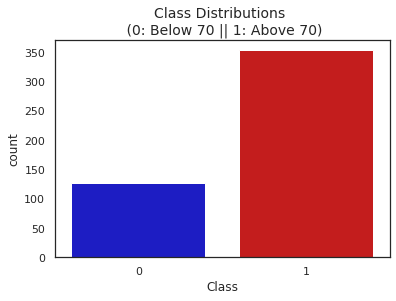

In [ ]:
import matplotlib.pyplot as plt
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=df_new, palette=colors)
plt.title('Class Distributions \n (0: Below 70 || 1: Above 70)', fontsize=14)

In [ ]:
print('Below 70', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Above 70', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')


Below 70 26.46 % of the dataset
Above 70 73.54 % of the dataset


In [ ]:
x_df = df_new.drop(["Class"], axis = 1)
x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Relation                  480 non-null    int64
 1   raisedhands               480 non-null    int64
 2   VisITedResources          480 non-null    int64
 3   AnnouncementsView         480 non-null    int64
 4   Discussion                480 non-null    int64
 5   ParentAnsweringSurvey     480 non-null    int64
 6   ParentschoolSatisfaction  480 non-null    int64
 7   StudentAbsenceDays        480 non-null    int64
dtypes: int64(8)
memory usage: 30.1 KB


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

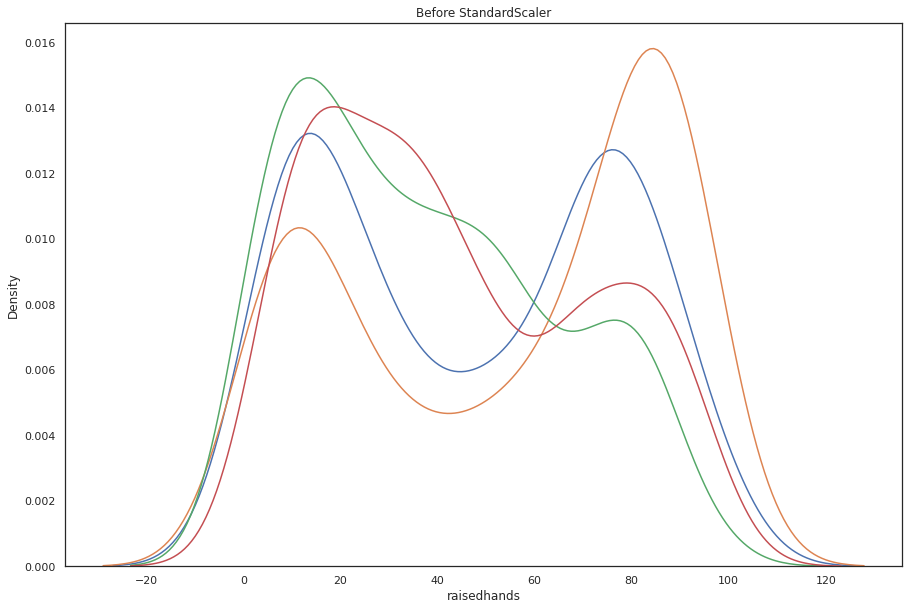

In [ ]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(15, 10))
ax1.set_title('Before StandardScaler')
sns.kdeplot(x_df['raisedhands'], ax=ax1);
sns.kdeplot(x_df['VisITedResources'], ax=ax1)
sns.kdeplot(x_df['AnnouncementsView'], ax=ax1)
sns.kdeplot(x_df['Discussion'], ax=ax1)

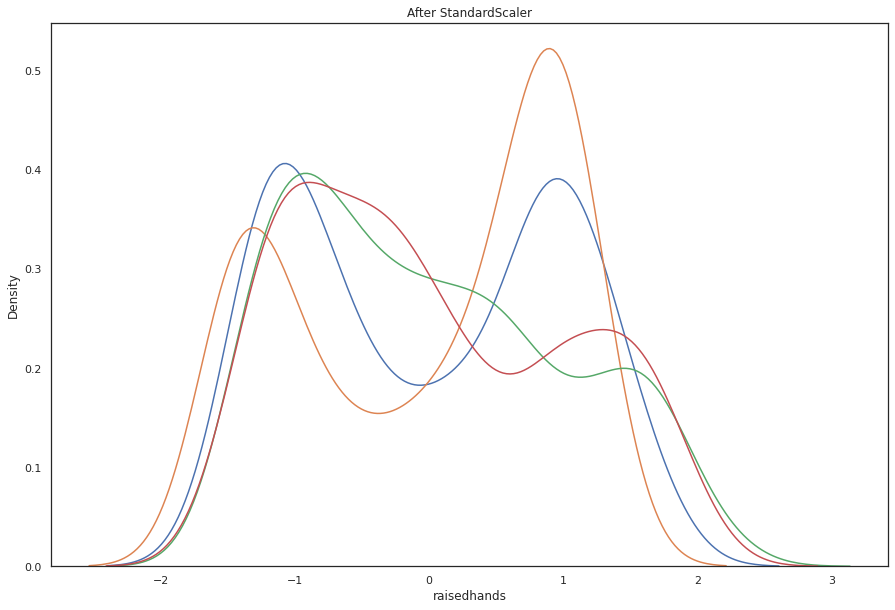

In [ ]:
col_names = list(x_df.columns)
s_scaler = preprocessing.StandardScaler()
df_s = s_scaler.fit_transform(x_df)

df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(15, 10))
ax1.set_title('After StandardScaler')
sns.kdeplot(df_s['raisedhands'], ax=ax1);
sns.kdeplot(df_s['VisITedResources'], ax=ax1)
sns.kdeplot(df_s['AnnouncementsView'], ax=ax1)
sns.kdeplot(df_s['Discussion'], ax=ax1)

In [ ]:
# Data Output
y=df_new['Class']
y.head()

0    1
1    1
2    0
3    0
4    1
Name: Class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Training Data 70% & Testing Data 30%

X_train, X_test, y_train, y_test = train_test_split(df_s, y, test_size=0.3)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((336, 8), (336,), (144, 8), (144,))

Bagging (Random Forest)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score

In [ ]:
kfold = StratifiedKFold(n_splits=10)

In [ ]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


model_RFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 1, verbose = 1)

model_RFC.fit(X_train,y_train)

RFC_best = model_RFC.best_estimator_

# Best score
model_RFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selectio

0.9168449197860962

In [ ]:
RFC_best

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred_rf = RFC_best.predict(X_test)

In [ ]:
confusion_matrix(y_test,pred_rf)

array([[ 30,   5],
       [  9, 100]])

In [ ]:
print("Accuracy :",accuracy_score(y_test, pred_rf))
# Accuracy of Random Forest Classification Model

Accuracy : 0.9027777777777778


In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, pred_rf)

0.7476240456234673

In [ ]:
rf_auc = roc_auc_score(y_test, pred_rf)
print('Random Forest : ROC AUC=%.3f' % (rf_auc))

Random Forest : ROC AUC=0.887


In [ ]:
from sklearn.metrics import auc

rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, pred_rf)
rf_roc_auc = auc(rf_fpr, rf_tpr)

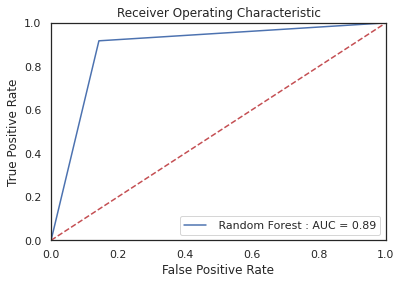

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(rf_fpr, rf_tpr, 'b', label = ' Random Forest : AUC = %0.2f' % rf_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Boosting**

In [ ]:
# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

model_adaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

model_adaDTC.fit(X_train,y_train)

ada_best = model_adaDTC.best_estimator_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:    8.7s finished


In [ ]:
pred_boost = ada_best.predict(X_test)

In [ ]:
confusion_matrix(y_test,pred_boost)

array([[28,  7],
       [11, 98]])

In [ ]:
print("Accuracy :",accuracy_score(y_test, pred_boost))
#Accuracy of AdaBoost Model

Accuracy : 0.875


In [ ]:
matthews_corrcoef(y_test, pred_boost)

0.6747591640195557

In [ ]:
ada_auc = roc_auc_score(y_test, pred_boost)
print('AdaBoost: ROC AUC=%.3f' % (ada_auc))

AdaBoost: ROC AUC=0.850


In [ ]:
ada_fpr, ada_tpr, ada_threshold = roc_curve(y_test, pred_boost)
ada_roc_auc = auc(ada_fpr, ada_tpr)

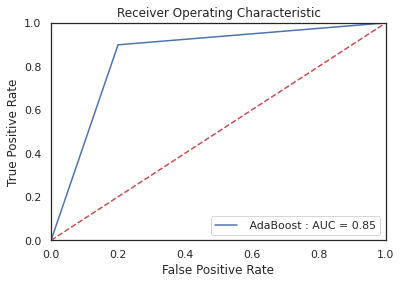

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(ada_fpr, ada_tpr, 'b', label = ' AdaBoost : AUC = %0.2f' % ada_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Stacking**

In [ ]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

model_SVC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 1, verbose = 1)

model_SVC.fit(X_train,y_train)

SVMC_best = model_SVC.best_estimator_

# Best score
model_SVC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    4.6s finished


0.9168449197860964

In [ ]:
pred_svc_ht = SVMC_best.predict(X_test)

In [ ]:
confusion_matrix(y_test,pred_svc_ht)

array([[ 32,   3],
       [  7, 102]])

In [ ]:
print("Accuracy :",accuracy_score(y_test, pred_svc_ht))
# Accuracy of SVC model

Accuracy : 0.9305555555555556


In [ ]:
matthews_corrcoef(y_test, pred_svc_ht)

0.8204889272273789

In [ ]:
svc_auc = roc_auc_score(y_test, pred_svc_ht)
print('SVC: ROC AUC=%.3f' % (svc_auc))

SVC: ROC AUC=0.925


In [ ]:
knn = KNeighborsClassifier()

knn_param_grid = {'n_neighbors':[1,3,5],
                  'leaf_size':[5,10,20,30]}

model_knn = GridSearchCV(knn,param_grid = knn_param_grid, cv=kfold, scoring="accuracy", n_jobs= 1, verbose = 1)

model_knn.fit(X_train,y_train)

knn_best = model_knn.best_estimator_

# Best score
model_knn.best_score_

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.7s finished


0.8956327985739749

In [ ]:
pred_knn_ht = knn_best.predict(X_test)

In [ ]:
confusion_matrix(y_test,pred_knn_ht)

array([[ 28,   7],
       [  5, 104]])

In [ ]:
print("Accuracy :",accuracy_score(y_test, pred_knn_ht))
# Accuracy of KNN model

Accuracy : 0.9166666666666666


In [ ]:
matthews_corrcoef(y_test, pred_knn_ht)

0.7696160770607472

In [ ]:
knn_auc = roc_auc_score(y_test, pred_knn_ht)
print('KNN : ROC AUC=%.3f' % (knn_auc))

KNN : ROC AUC=0.877


In [ ]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


model_ET = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 1, verbose = 1)

model_ET.fit(X_train,y_train)

ExtC_best = model_ET.best_estimator_

# Best score
model_ET.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selectio

0.9137254901960784

In [ ]:
pred_et_ht = ExtC_best.predict(X_test)

In [ ]:
print("Accuracy :",accuracy_score(y_test, pred_et_ht))
# Accuracy of Extra Tree model

Accuracy : 0.9305555555555556


In [ ]:
matthews_corrcoef(y_test, pred_et_ht)

0.8154216107311043

In [ ]:
et_auc = roc_auc_score(y_test, pred_et_ht)
print('ET : ROC AUC=%.3f' % (et_auc))

ET : ROC AUC=0.915


In [ ]:
# Combine Base Classifier Model (SVC, RF , ET) 
classifiers_ht = [('svc', SVMC_best),
               ('et', ExtC_best),                             
               ('knn', knn_best)]

In [ ]:
from sklearn.ensemble import StackingClassifier
clf_ht = StackingClassifier(estimators=classifiers_ht, 
                         final_estimator=LogisticRegression(),
                         stack_method='auto',
                         n_jobs=-1,
                         passthrough=False)

In [ ]:
clf_ht.fit(X_train,y_train)

StackingClassifier(cv=None,
                   estimators=[('svc',
                                SVC(C=10, break_ties=False, cache_size=200,
                                    class_weight=None, coef0=0.0,
                                    decision_function_shape='ovr', degree=3,
                                    gamma=0.01, kernel='rbf', max_iter=-1,
                                    probability=True, random_state=None,
                                    shrinking=True, tol=0.001, verbose=False)),
                               ('et',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion...
                                                     n_jobs=None, n_neighbors=1,
                                                     p=2, weights='uniform'))],
           

In [ ]:
pred_clf_ht = clf_ht.predict(X_test)

In [ ]:
confusion_matrix(y_test,pred_clf_ht)

array([[ 31,   4],
       [  4, 105]])

In [ ]:
print("Accuracy :",accuracy_score(y_test, pred_clf_ht))
# Accuracy of Stacking Model

Accuracy : 0.9444444444444444


In [ ]:
matthews_corrcoef(y_test, pred_clf_ht)

0.8490170380078637

In [ ]:
sta_auc = roc_auc_score(y_test, pred_clf_ht)
print('Stacking: ROC AUC=%.3f' % (sta_auc))

Stacking: ROC AUC=0.925


In [ ]:
sta_fpr, sta_tpr, sta_threshold = roc_curve(y_test, pred_clf_ht)
sta_roc_auc = auc(sta_fpr, sta_tpr)

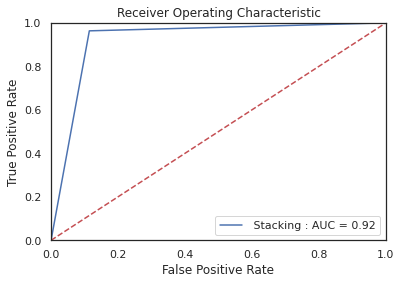

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(sta_fpr, sta_tpr, 'b', label = ' Stacking : AUC = %0.2f' % sta_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

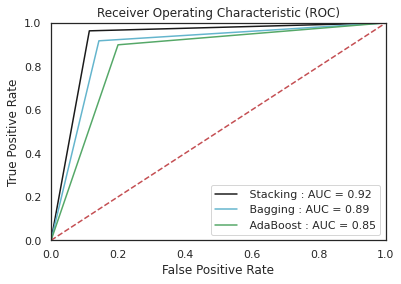

In [ ]:
plt.title('Receiver Operating Characteristic (ROC)')

plt.plot(sta_fpr, sta_tpr, 'k', label = ' Stacking : AUC = %0.2f' % sta_roc_auc)
plt.plot(rf_fpr, rf_tpr, 'c', label = ' Bagging : AUC = %0.2f' % rf_roc_auc)
plt.plot(ada_fpr, ada_tpr, 'g', label = ' AdaBoost : AUC = %0.2f' % ada_roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**ANN Model**

In [ ]:
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from numpy.random import seed

In [ ]:
def create_model(lyrs=[8], act='linear', opt='Adam', dr=0.0):
    
    # set random seed for reproducibility
    seed(42)
    tf.random.set_seed(42)
    
    model = Sequential()
    
    # create first hidden layer
    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act))
    
    # create additional hidden layers
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    # add dropout, default is none
    model.add(Dropout(dr))
    
    # create output layer
    model.add(Dense(1, activation='sigmoid'))  # output layer
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [ ]:
model_1 = create_model()
print(model_1.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [16, 32, 64]
epochs = [50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# search the grid
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2)  

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] batch_size=16, epochs=50 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......................... batch_size=16, epochs=50, total=   1.9s
[CV] batch_size=16, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] ......................... batch_size=16, epochs=50, total=   1.9s
[CV] batch_size=16, epochs=50 ........................................
[CV] ......................... batch_size=16, epochs=50, total=   1.3s
[CV] batch_size=16, epochs=100 .......................................
[CV] ........................ batch_size=16, epochs=100, total=   3.2s
[CV] batch_size=16, epochs=100 .......................................
[CV] ........................ batch_size=16, epochs=100, total=   3.2s
[CV] batch_size=16, epochs=100 .......................................
[CV] ........................ batch_size=16, epochs=100, total=   2.1s
[CV] batch_size=32, epochs=50 ........................................
[CV] ......................... batch_size=32, epochs=50, total=   1.0s
[CV] batch_size=32, epochs=50 ........................................
[CV] ......................... batch_size=32, epochs=50, total=   1.5s
[CV] batch_size=32, epochs=50 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   29.4s finished


In [ ]:
# summarize results
print("Best Use: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best Use: 0.916667 using {'batch_size': 32, 'epochs': 100}
0.913690 (0.021045) with: {'batch_size': 16, 'epochs': 50}
0.913690 (0.029463) with: {'batch_size': 16, 'epochs': 100}
0.910714 (0.026285) with: {'batch_size': 32, 'epochs': 50}
0.916667 (0.023435) with: {'batch_size': 32, 'epochs': 100}
0.889881 (0.027600) with: {'batch_size': 64, 'epochs': 50}
0.913690 (0.022272) with: {'batch_size': 64, 'epochs': 100}


In [ ]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, verbose=0)

# define the grid search parameters for optimizer
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam']
param_grid = dict(opt=optimizer)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] opt=SGD .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......................................... opt=SGD, total=   1.9s
[CV] opt=SGD .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV] .......................................... opt=SGD, total=   1.7s
[CV] opt=SGD .........................................................
[CV] .......................................... opt=SGD, total=   1.6s
[CV] opt=SGD .........................................................
[CV] .......................................... opt=SGD, total=   1.9s
[CV] opt=SGD .........................................................
[CV] .......................................... opt=SGD, total=   1.9s
[CV] opt=RMSprop .....................................................
[CV] ...................................... opt=RMSprop, total=   2.1s
[CV] opt=RMSprop .....................................................
[CV] ...................................... opt=RMSprop, total=   1.8s
[CV] opt=RMSprop .....................................................
[CV] ...................................... opt=RMSprop, total=   2.1s
[CV] opt=RMSprop .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   58.5s finished


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.910755 using {'opt': 'Adam'}
0.910667 (0.026825) with: {'opt': 'SGD'}
0.904829 (0.027387) with: {'opt': 'RMSprop'}
0.741001 (0.046198) with: {'opt': 'Adagrad'}
0.690386 (0.059652) with: {'opt': 'Adadelta'}
0.910755 (0.026534) with: {'opt': 'Adam'}
0.910755 (0.026534) with: {'opt': 'Nadam'}


In [ ]:
seed(42)
tf.random.set_seed(42)

# create model
model = KerasClassifier(build_fn=create_model, 
                        epochs=100, batch_size=32, verbose=0)

# define the grid search parameters for layer
layers = [[8],[10],[10,5],[12,6],[12,8,4]]
param_grid = dict(lyrs=layers)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] lyrs=[8] ........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......................................... lyrs=[8], total=   2.0s
[CV] lyrs=[8] ........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ......................................... lyrs=[8], total=   1.9s
[CV] lyrs=[8] ........................................................
[CV] ......................................... lyrs=[8], total=   2.0s
[CV] lyrs=[8] ........................................................
[CV] ......................................... lyrs=[8], total=   2.0s
[CV] lyrs=[8] ........................................................
[CV] ......................................... lyrs=[8], total=   1.8s
[CV] lyrs=[10] .......................................................
[CV] ........................................ lyrs=[10], total=   2.0s
[CV] lyrs=[10] .......................................................
[CV] ........................................ lyrs=[10], total=   1.7s
[CV] lyrs=[10] .......................................................
[CV] ........................................ lyrs=[10], total=   1.7s
[CV] lyrs=[10] .......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   48.3s finished


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.913740 using {'lyrs': [10]}
0.910755 (0.026534) with: {'lyrs': [8]}
0.913740 (0.028757) with: {'lyrs': [10]}
0.907770 (0.025543) with: {'lyrs': [10, 5]}
0.907770 (0.025543) with: {'lyrs': [12, 6]}
0.907770 (0.025543) with: {'lyrs': [12, 8, 4]}


In [ ]:
# create model
model = KerasClassifier(build_fn=create_model, 
                        epochs=100, batch_size=32, verbose=0)

# define the grid search parameters
drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.5]
param_grid = dict(dr=drops)
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] dr=0.0 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................................... dr=0.0, total=   1.8s
[CV] dr=0.0 ..........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] ........................................... dr=0.0, total=   1.8s
[CV] dr=0.0 ..........................................................
[CV] ........................................... dr=0.0, total=   1.7s
[CV] dr=0.0 ..........................................................
[CV] ........................................... dr=0.0, total=   2.0s
[CV] dr=0.0 ..........................................................
[CV] ........................................... dr=0.0, total=   2.0s
[CV] dr=0.01 .........................................................
[CV] .......................................... dr=0.01, total=   2.0s
[CV] dr=0.01 .........................................................
[CV] .......................................... dr=0.01, total=   1.8s
[CV] dr=0.01 .........................................................
[CV] .......................................... dr=0.01, total=   2.0s
[CV] dr=0.01 .........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   56.5s finished


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.913696 using {'dr': 0.2}
0.910755 (0.026534) with: {'dr': 0.0}
0.910755 (0.026534) with: {'dr': 0.01}
0.907814 (0.028622) with: {'dr': 0.05}
0.910755 (0.026534) with: {'dr': 0.1}
0.913696 (0.025653) with: {'dr': 0.2}
0.913696 (0.025653) with: {'dr': 0.5}


In [ ]:
# create final model
model_2 = create_model(lyrs=[10], dr=0.2)

print(model_2.summary())

Model: "sequential_166"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_372 (Dense)            (None, 10)                90        
_________________________________________________________________
dropout_166 (Dropout)        (None, 10)                0         
_________________________________________________________________
dense_373 (Dense)            (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# train model on full train set, with 70/30 CV split
training = model_2.fit(X_train, y_train, epochs=100, batch_size=32, 
                     validation_split=0.3, verbose=0)

# evaluate the model
scores = model_2.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model_2.metrics_names[1], scores[1]*100))

11/11 [==============================] - 0s 2ms/step - loss: 0.2067 - accuracy: 0.9226

accuracy: 92.26%


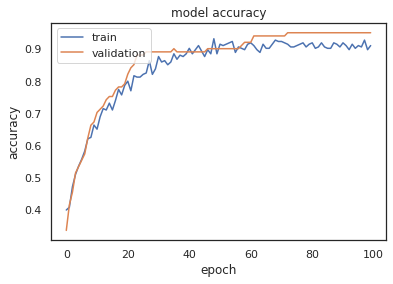

In [ ]:
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Train Accuracy:, Test Accuracy: ([0.206703782081604, 0.9226190447807312], [0.19999678432941437, 0.9375])


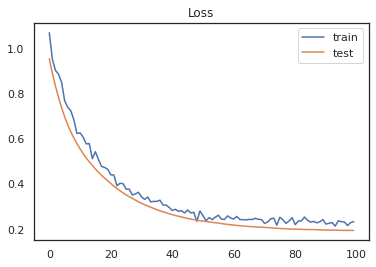

In [ ]:
from matplotlib import pyplot
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
train_acc = model_2.evaluate(X_train, y_train,verbose=0)
test_acc = model_2.evaluate(X_test, y_test,verbose=0)

# plot loss during training

pyplot.title('Loss')
pyplot.plot(training.history['loss'], label='train')
pyplot.plot(training.history['val_loss'], label='test')
pyplot.legend()


print('Train Accuracy:, Test Accuracy:' , (train_acc, test_acc))

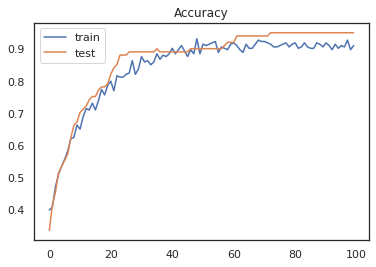

In [ ]:
# plot accuracy during training
pyplot.title('Accuracy')
pyplot.plot(training.history['accuracy'], label='train')
pyplot.plot(training.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
pred_ann = model_2.predict(X_test)

In [ ]:
ann_auc = roc_auc_score(y_test, pred_ann)
print('ANN: ROC AUC=%.3f' % (ann_auc))


ANN: ROC AUC=0.976


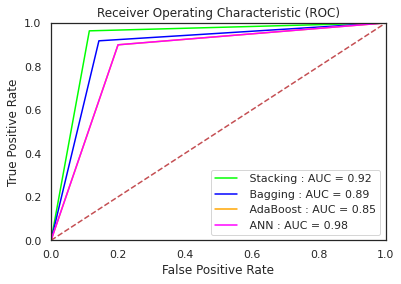

In [ ]:
plt.title('Receiver Operating Characteristic (ROC)')

plt.plot(sta_fpr, sta_tpr, 'lime', label = ' Stacking : AUC = %0.2f' % sta_roc_auc)
plt.plot(rf_fpr, rf_tpr, 'blue', label = ' Bagging : AUC = %0.2f' % rf_roc_auc)
plt.plot(ada_fpr, ada_tpr, 'orange', label = ' AdaBoost : AUC = %0.2f' % ada_roc_auc)
plt.plot(ada_fpr, ada_tpr, 'magenta', label = ' ANN : AUC = %0.2f' % ann_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()